In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


* Lectura de datos

In [3]:
df = pd.read_csv('../datasets/Cleaned_Students_Performance.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333


* Descripcion de la estructura de datos:

- Gender : Genero del estudiante (1 - Hombre , 0 - Mujer).
- Race Ethnicity : Identidad etnica del estudiante.
- Parental Level of Education : Maximo nivel de educacion de sus padres.
- Lunch : Muestra si el estudiante recibe descuento en almuerzos (1 - Si , 0 - No).
- Test Preparation Course : El estudiante tuvo que rendir un examen de admision (1 - Si , 0 - No).
- Math Score : Notas en matematicas.
- Reading Score : Performace en lectura.
- Writing Score : Performace en escritura.
- Total Score : Puntaje total obtenido por el estudiante.
- Average Score : Promedio de puntajes.

* Estadisticas Descriptivas

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,1000.0,0.482000,0.499926,0.0,0.000000,0.000000,1.000000,1.0
lunch,1000.0,0.645000,0.478753,0.0,0.000000,1.000000,1.000000,1.0
test_preparation_course,1000.0,0.358000,0.479652,0.0,0.000000,0.000000,1.000000,1.0
math_score,1000.0,66.089000,15.163080,0.0,57.000000,66.000000,77.000000,100.0
reading_score,1000.0,69.169000,14.600192,17.0,59.000000,70.000000,79.000000,100.0
writing_score,1000.0,68.054000,15.195657,10.0,57.750000,69.000000,79.000000,100.0
total_score,1000.0,203.312000,42.771978,27.0,175.000000,205.000000,233.000000,300.0
average_score,1000.0,67.770667,14.257326,9.0,58.333333,68.333333,77.666667,100.0


* Se puede concluir que:
 - en matematicas: el puntaje mas bajo es 0 y el mas alto es 100
 - mas del 75% de los estudiantes tiene un puntaje mayor a 55 en las tres areas a evaluar
 - lectura es la habilidad que menos puntajes bajos tiene, el mas bajo es 17 y el mas alto 100


* EDA:

C:\Users\Ivan\AppData\Local\Temp\ipykernel_14644\51345867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='math_score', data=df, palette="rainbow_r")


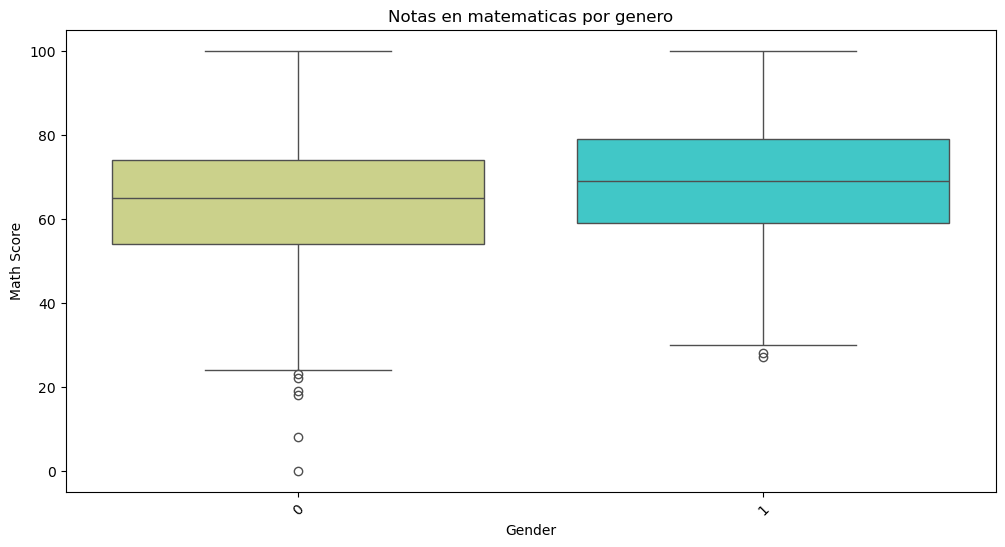

In [6]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='gender', y='math_score', data=df, palette="rainbow_r")

plt.title('Notas en matematicas por genero')

plt.xlabel('Gender')

plt.ylabel('Math Score')

plt.xticks(rotation=45)

plt.show()

* Los hombres son ligeramente mejores en matematicas que las mujeres

C:\Users\Ivan\AppData\Local\Temp\ipykernel_14644\653202676.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='writing_score', data=df, palette="twilight_shifted")


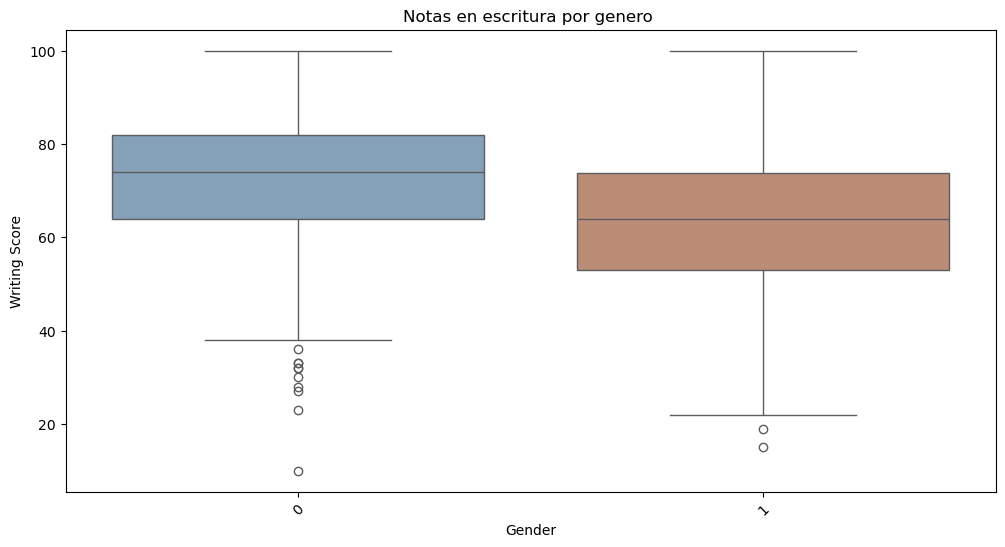

In [7]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='gender', y='writing_score', data=df, palette="twilight_shifted")

plt.title('Notas en escritura por genero ')

plt.xlabel('Gender')

plt.ylabel('Writing Score')

plt.xticks(rotation=45)

plt.show()

* Hay una diferencia leve entre los generos, las mujeres parece sen ligeramente mejores en escritura

C:\Users\Ivan\AppData\Local\Temp\ipykernel_14644\977686630.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parental_level_of_education', y='average_score', data=df, palette="Blues")


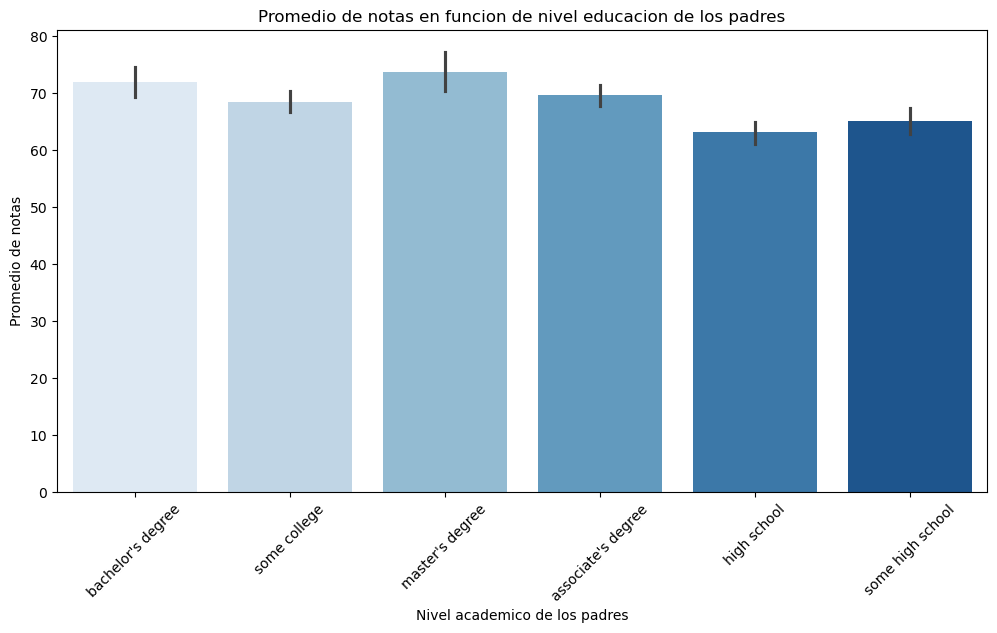

In [10]:
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)



# Bar plot of average scores by parental level of education

plt.figure(figsize=(12, 6))

sns.barplot(x='parental_level_of_education', y='average_score', data=df, palette="Blues")

plt.title('Promedio de notas en funcion de nivel educacion de los padres')

plt.xlabel('Nivel academico de los padres')

plt.ylabel('Promedio de notas')

plt.xticks(rotation=45)

plt.show()

* El nivel academico de los padres parece no tener demasiada influencia en el promedio de notas de sus hijos, aunque existe una diferencia apreciable entre aquellos que solo llegaron hasta la secundaria y los que tienen postgrados

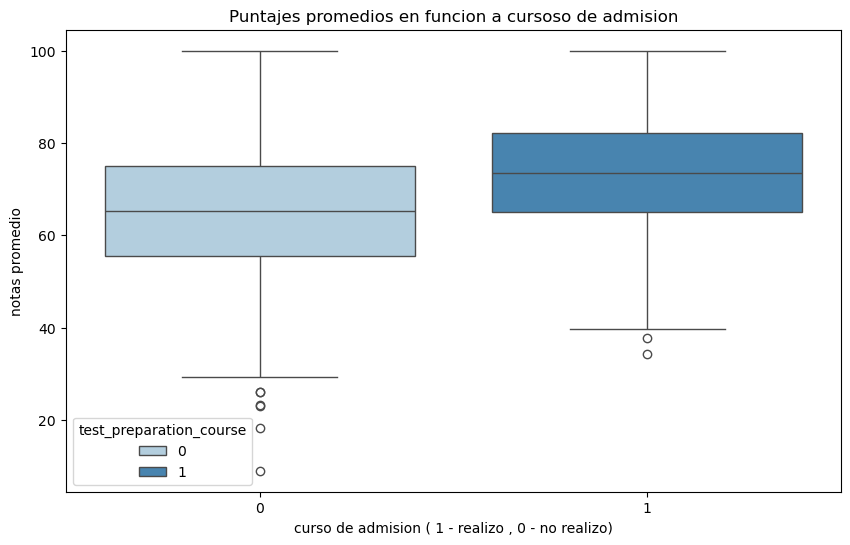

In [11]:
plt.figure(figsize = (10 , 6))

sns.boxplot(x = 'test_preparation_course' , y = 'average_score' , data = df , hue = 'test_preparation_course' , palette = 'Blues')

plt.title("Puntajes promedios en funcion a cursoso de admision")

plt.xlabel("curso de admision ( 1 - realizo , 0 - no realizo)")

plt.ylabel("notas promedio")

plt.show()

* Aquellos alumnos que aprobaron un curso de adminision tienen mejores promedios que aquellos que no lo hicieron, esto hace sentido al estar los primeros con mejor base 

* Analisis de correlacion de variables

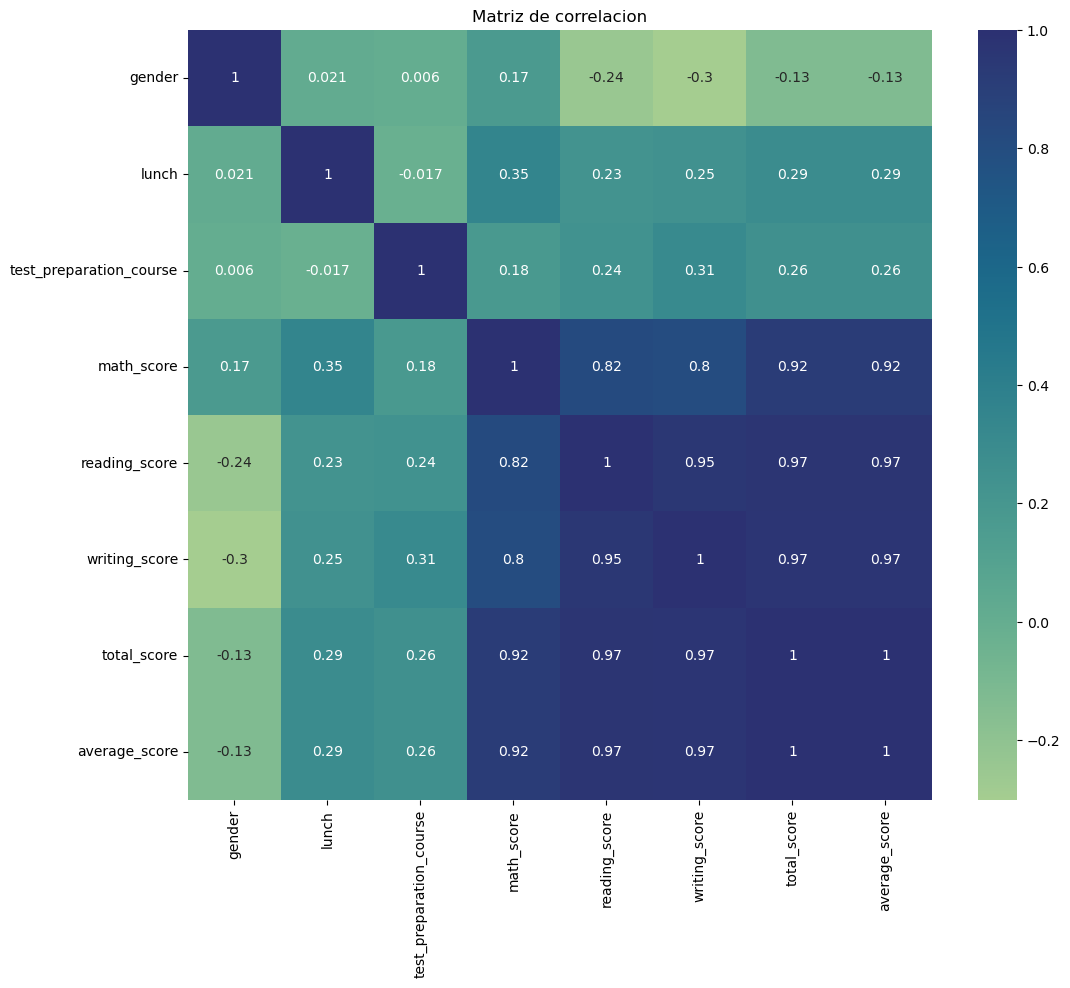

In [13]:
correlation_matrix = df[['gender','lunch','test_preparation_course','math_score','reading_score','writing_score','total_score','average_score']].corr()

plt.figure(figsize = (12 , 10))

sns.heatmap(correlation_matrix , annot = True , cmap = 'crest')

plt.title("Matriz de correlacion")

plt.show()

* Se ve alta correlacion entre las notas de las materias, lo que sugiere que aquellos estudiantes que tienen buenas notas en una, es muy probable que sean buenas en las otras tambien

* Caracteristicas y desafios
 - Al parecer en el dataset se denota que los estudiantes que son buenos en algo pueden ser igual de buenos en las otras materias
 - El concepto de comparar el grado academico de los padres con el desempenho de los hijos es de por si un tema interesante
 - Una problematica a abordar en este dataset, puede ser predecir si es que con mayores ventajas (haciendo curso de admision, almuerzo gratis y padres con educacion superior) una persona puede tener mejores promedios